# Air B&B - Seattle Dataset - Analysis

# Business Understanding

In this analysis we are looking at a dataset spanning 1 year in AirB&B data, including the listings and bookings. The analysis beneath will answer some questions of interest to the potential costumers of Air B&B.

The questions are the following :
   - Which are the cheapest months to rent an AirBnB in Seattle ?
   - When are the busiest times to visit Seattle ?
   - Which are the most expensive and least expensive neighbourhoods in Seattle ?
   
These questions and their relevant analysis are used to help potential costumers/renters to pick a date and location when they visit Seattle.
   
We will start this analysis by importing and cleaning the different parts of the dataset.    

# Data Understanding

In [1]:
#Import necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Import Listing dataset
df_listings = pd.read_csv('listings.csv') # Available properties to rent in Seattle

In [3]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There wasn't a need to clean missing data in this analysis as the variables used we're complete for these purposes

# Data Cleaning and Analysis

## Question 1 - Which are the cheapest months to rent an AirBnB in Seattle ?

In [7]:
#Import calender dataset
df_calender= pd.read_csv('calendar.csv') # Price/Availabilty of listings per date

In [8]:
df_calender.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [9]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
df_calender['date'] = pd.to_datetime(df_calender['date']) #Adjust data type of the data column
df_calender[['price']] = df_calender[['price']].replace('[\$,]','',regex=True).astype(float) #Remove valuta symbol form price column
df_calender = df_calender.dropna() #Drop missing values

In [11]:
#Compute average price for a property in Seattle per Month
AvgMonth = df_calender.groupby(df_calender['date'].dt.strftime('%B'),sort=False)['price'].mean()

In [12]:
print(AvgMonth.sort_values)

<bound method Series.sort_values of date
January      122.912176
February     124.293927
March        128.644488
April        135.097005
May          139.538183
June         147.473137
July         152.094150
August       150.656594
September    143.255949
October      137.031939
November     135.688738
December     137.251835
Name: price, dtype: float64>


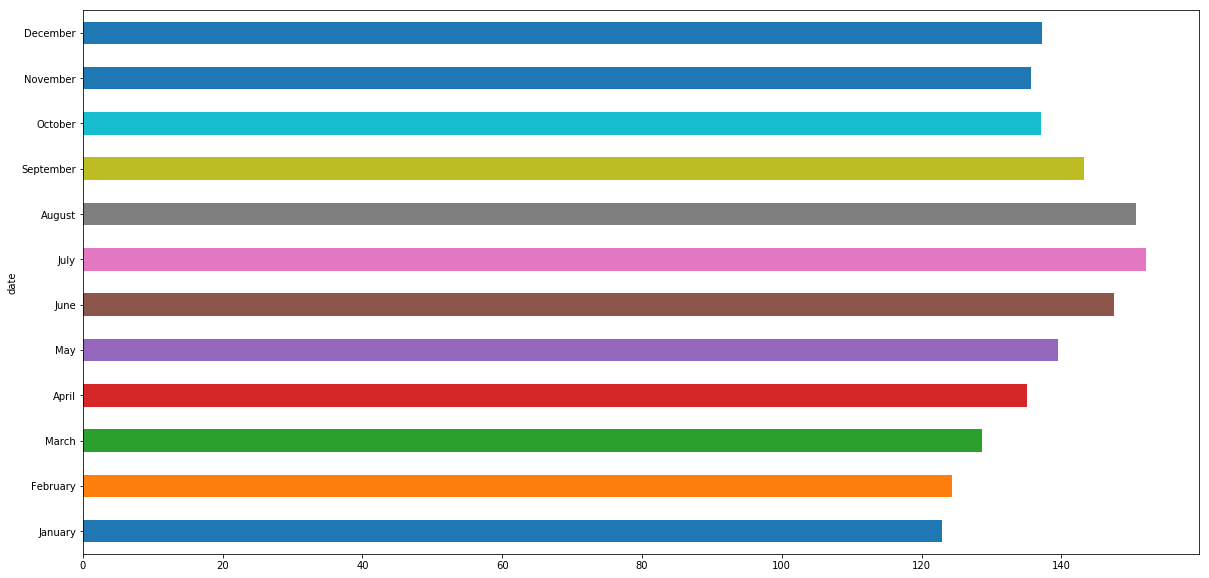

In [13]:
AvgMonth.plot(kind = 'barh' , figsize = (20,10));

## Results questions 1

### According the above information and plot about the average price per month, it seems it's expensive to rent a property during the summer months and least expensive in the first couple of months of the year.

## Question 2 - When are the busiest times to visit Seattle ?

In [14]:
#Import calender dataset
df_calender= pd.read_csv('calendar.csv').drop(columns='price') # Price/Availabilty of listings per date

In [15]:
df_calender.available.value_counts() #Count number of properties that we're rented out and how many stayed available

t    934542
f    459028
Name: available, dtype: int64

In [16]:
#Copy calender dataset
popularity = df_calender.copy()

#Show non available properties
popularity = popularity[popularity['available'] =='f']

#Group by date
popularity = popularity.groupby('date')['listing_id'].count()

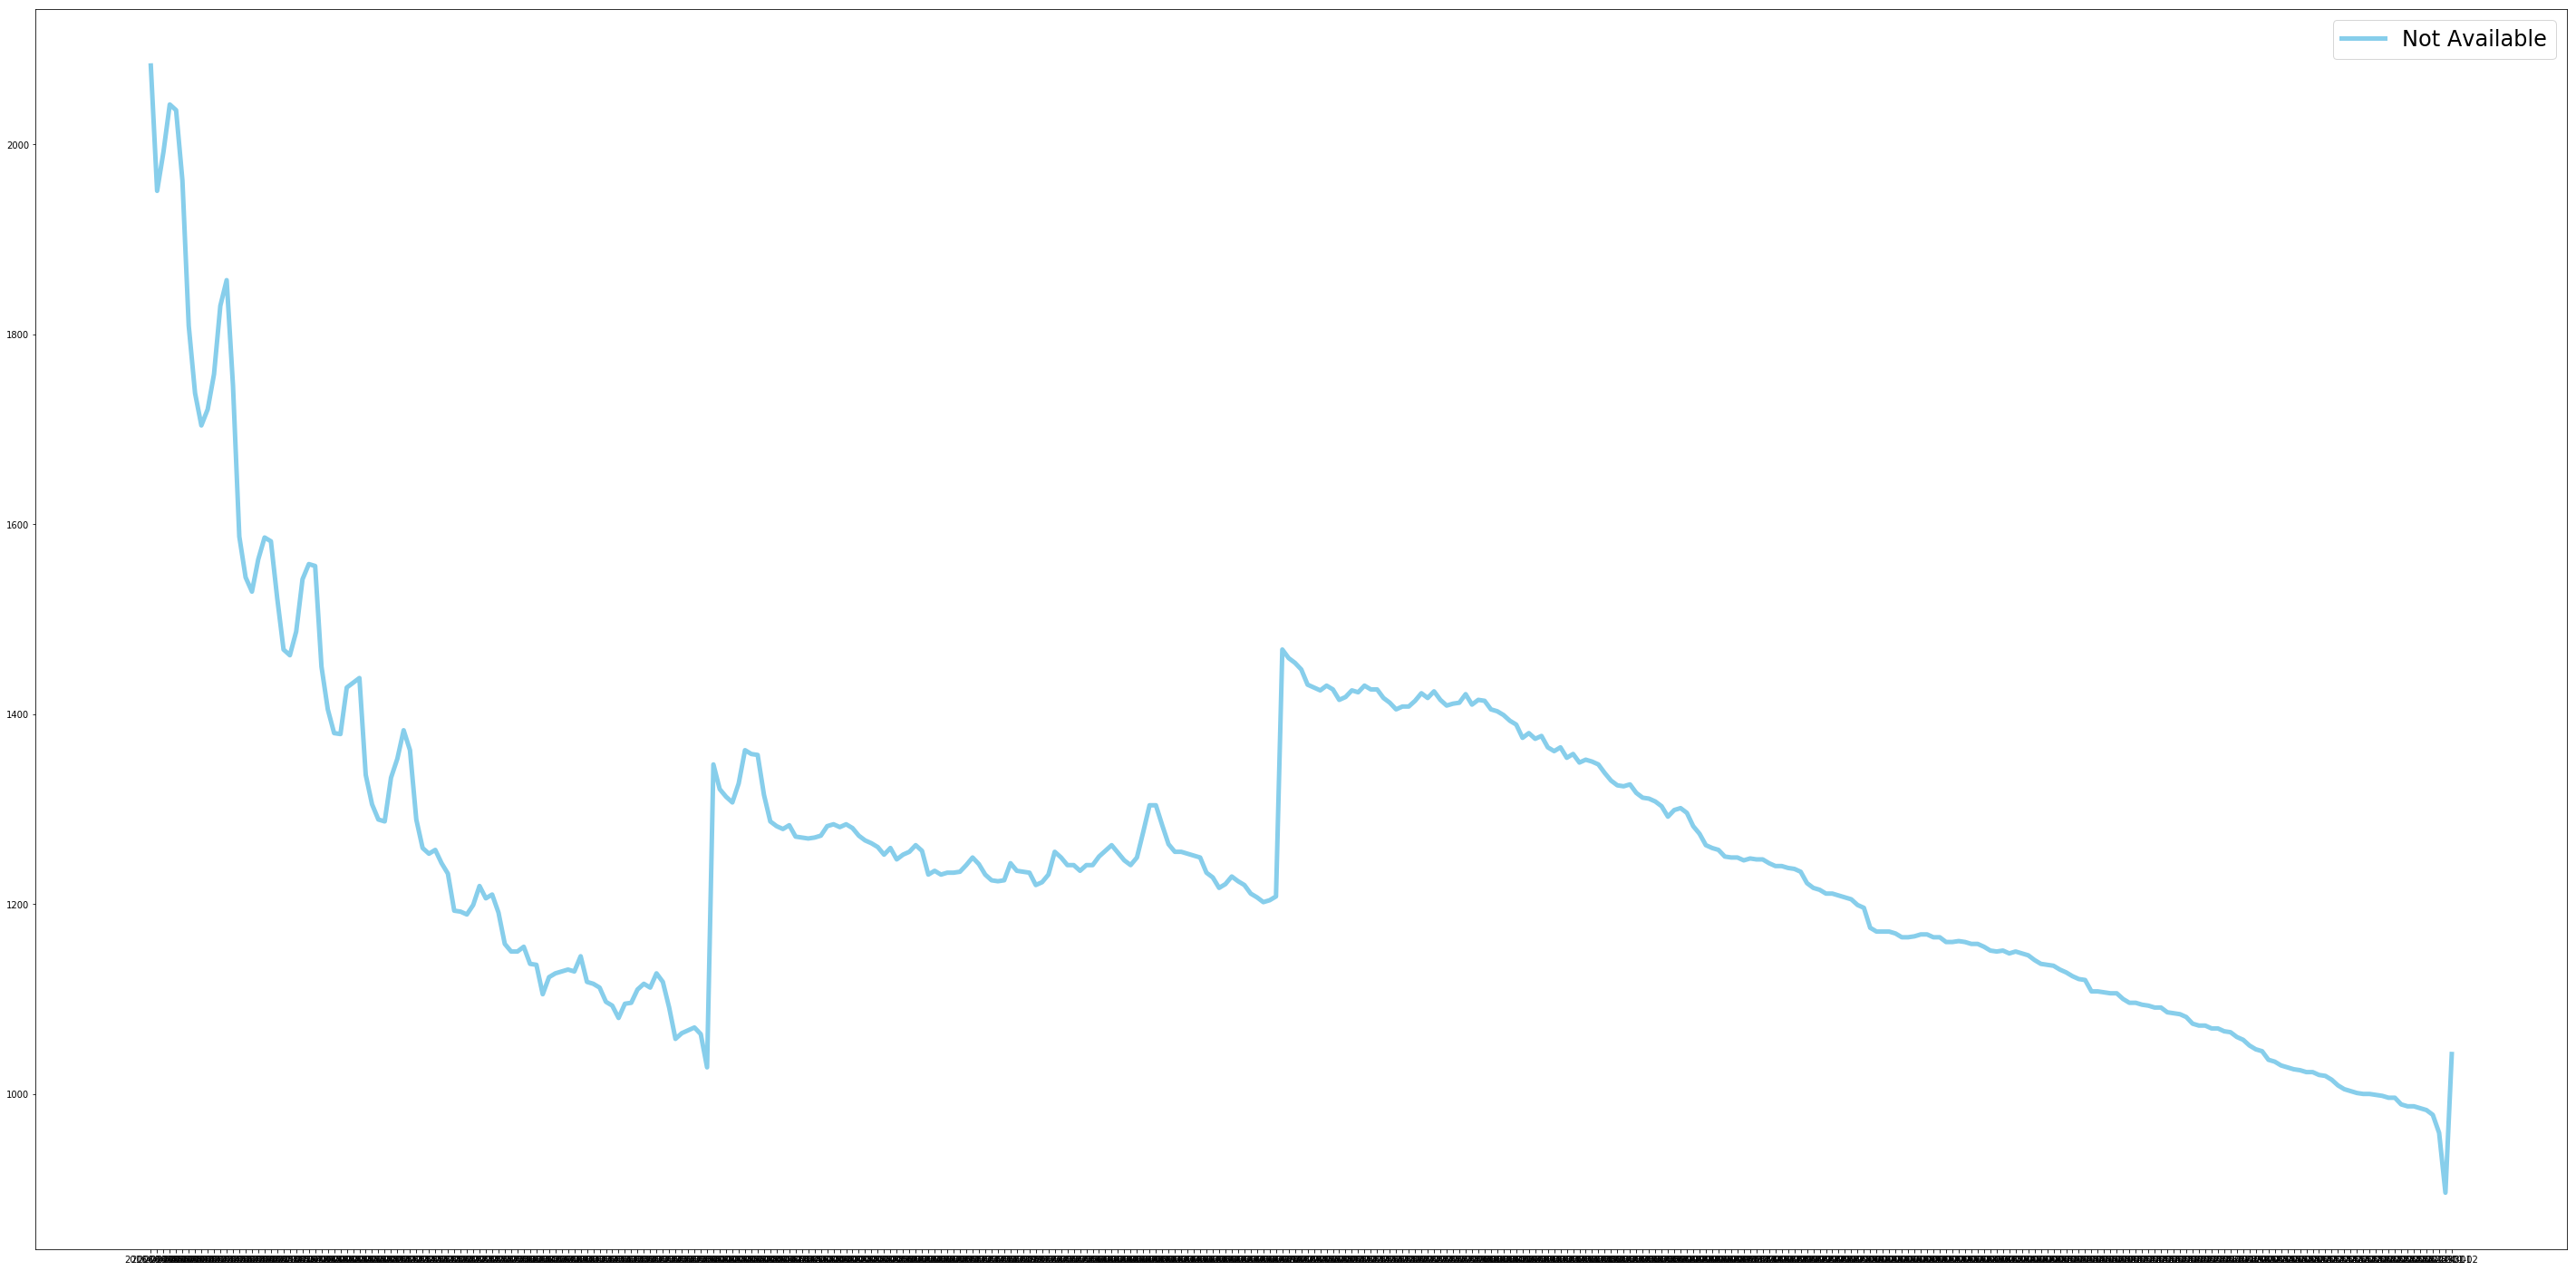

In [17]:
# Plot number of non available properties per month
df = pd.DataFrame({'date': popularity.index, 'Not Available': popularity.values })

plt.figure(figsize=(40,20))
locs, labels = plt.xticks()
plt.rcParams.update({'font.size': 24})
plt.plot( 'date', 'Not Available', data=df, marker='', markerfacecolor ='blue', color ='skyblue', linewidth=5)
plt.legend()
plt.tight_layout()

In [18]:
popularity.sort_values(ascending=False).head(10)

date
2016-01-04    2083
2016-01-07    2042
2016-01-08    2036
2016-01-06    1992
2016-01-09    1962
2016-01-05    1951
2016-01-16    1857
2016-01-15    1830
2016-01-10    1809
2016-01-14    1758
Name: listing_id, dtype: int64

#### If we look at the number of non available properties we can know the popularity of Seatle AirBnB's. It seems the beginning of the year is the most busy, declining untill the summer months and then dropping again.

In [19]:
#Start with a clean calender dataset
calender_time= df_calender.copy()

#Rename listing id to id to ease merging
calender_time.rename(columns={'listing_id': 'id'},inplace = True)

#Extract id and neighbourhood
listings_location= df_listings[['id','neighbourhood_cleansed']]

#Merge listings and calender data
popular_neigh = pd.merge(calender_time, listings_location, how='left', on=['id'])

In [20]:
#filter for when not available
popular_neigh = popular_neigh[popular_neigh['available']=='f']

#get year column from date
popular_neigh['year']= popular_neigh.date.str[:4]

In [21]:
#Most popular neighbourhoods
popular_neigh.groupby(['year','neighbourhood_cleansed'])['id'].count().sort_values(ascending=False).head(15)

year  neighbourhood_cleansed   
2016  Broadway                     54246
      Belltown                     31904
      Fremont                      18272
      Wallingford                  18094
      First Hill                   16059
      Minor                        14793
      Lower Queen Anne             14793
      Stevens                      13169
      East Queen Anne              11938
      Greenwood                    11487
      University District          11326
      Central Business District    10145
      Adams                         9769
      Phinney Ridge                 9377
      Ravenna                       9102
Name: id, dtype: int64

In [22]:
popular_neigh.groupby(['year','neighbourhood_cleansed'])['id'].count().sort_values(ascending=True).head(15)

year  neighbourhood_cleansed
2017  Holly Park                1
      Sunset Hill               1
      Olympic Hills             2
      Interbay                  2
      Industrial District       2
      High Point                2
      View Ridge                2
      Georgetown                2
      Cedar Park                2
      Pinehurst                 2
      Briarcliff                2
      Arbor Heights             2
      Victory Heights           3
      South Park                3
      Broadview                 4
Name: id, dtype: int64

## Results Question 2
### If you look at the above number, certain neighbourhoud are much more popular than others

## Question 3 - Which are the most expensive and least expensive neighbourhoods in Seattle ?

In [23]:
#Remove valuta symbol from price column
df_listings['price'].replace('[\$,]', '', regex=True, inplace = True)

#Convert datatypes
df_listings.price = df_listings.price.astype(float)

In [24]:
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head()

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474


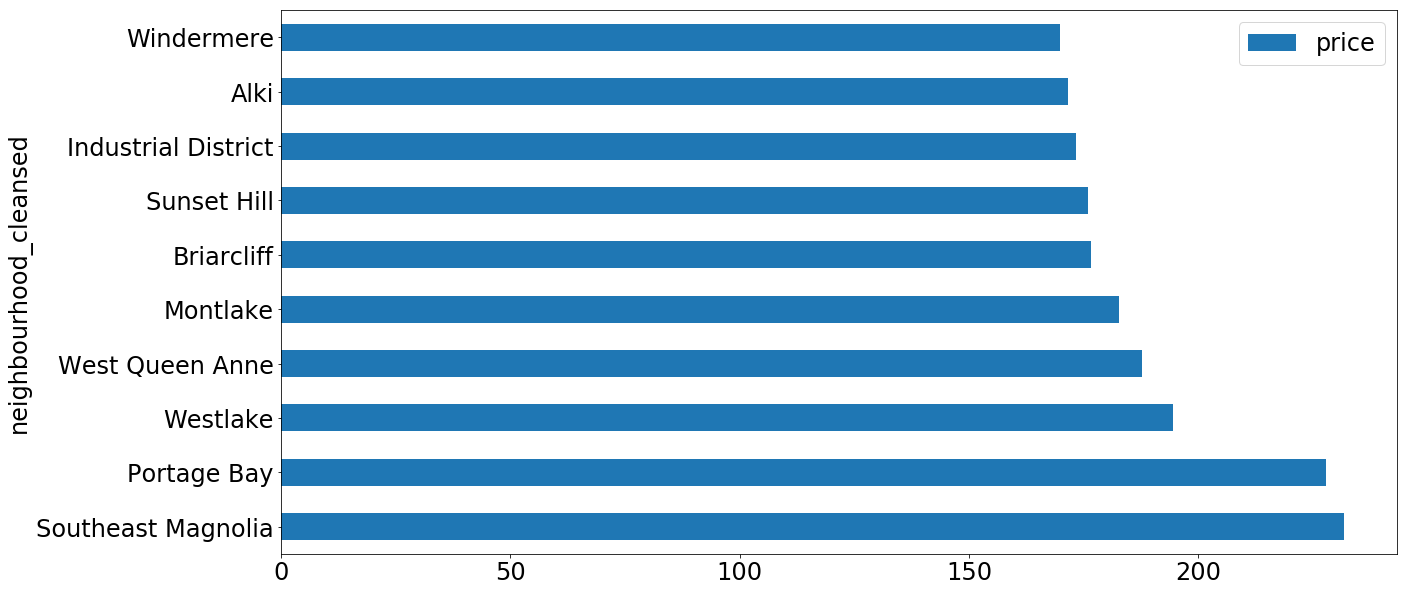

In [25]:
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head(10).plot(kind = 'barh' , figsize = (20,10))

In [26]:
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=True).head()

,price
neighbourhood_cleansed,
Rainier Beach,68.555556
Olympic Hills,71.687500
South Delridge,74.666667
Georgetown,76.125000
North Delridge,76.375000


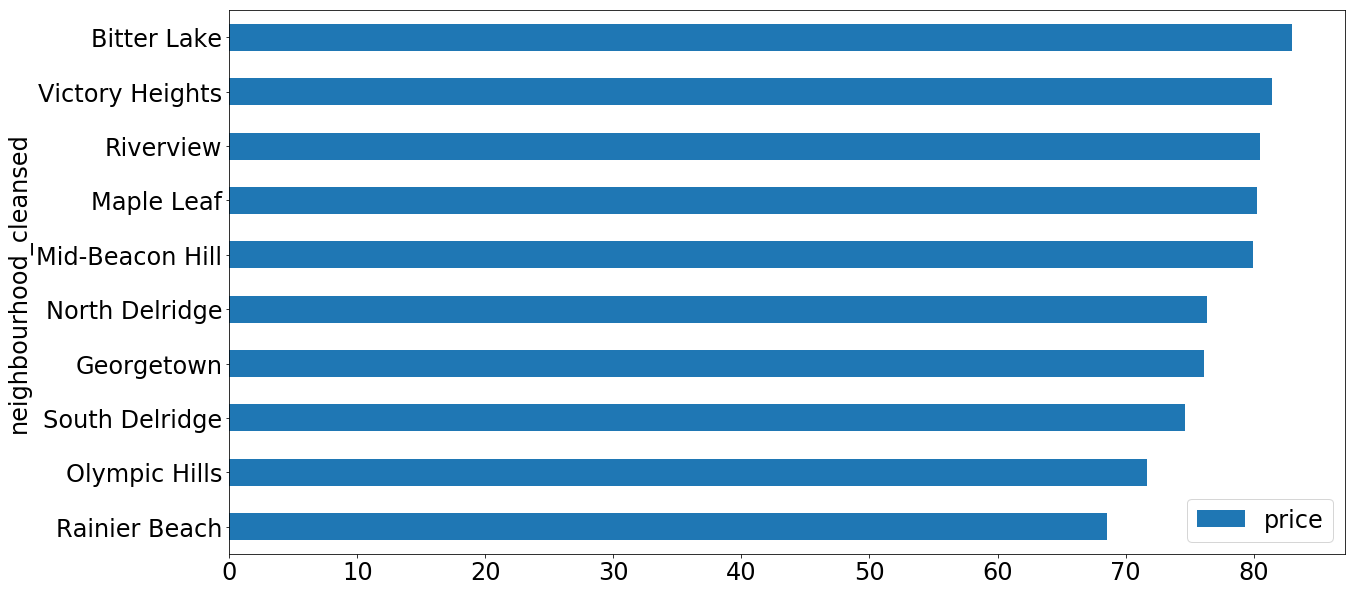

In [27]:
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=True).head(10).plot(kind = 'barh' , figsize = (20,10))

## Results Questions 3

#### Here you can see the cheapest and most expensive neighbourhoouds in Seattle, on average